In [18]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Abrir archivo NanoAOD
path_NanoAOD = "/mnt/ArchivosCompartidos/BeyondSM/DarkMatter/RootFiles/NanoAODn30k.root"
file = uproot.open(path_NanoAOD)  # cambia el nombre si es necesario
tree = file["Events"]  # El árbol estándar en NanoAOD

In [20]:
arrays = tree.arrays(["Jet_pt", "Jet_eta", "MET_pt", "nElectron", "nMuon"], library="ak")
jets_pt = arrays["Jet_pt"]
jets_eta = arrays["Jet_eta"]
met_pt = arrays["MET_pt"]

In [23]:
# Al menos un jet con pt > 100 GeV
has_hard_jet = ak.any(jets_pt > 100, axis=1)

# MET > 200 GeV
has_high_met = met_pt > 200

# Opcional: veto de leptones
no_leptons = (arrays["nElectron"] == 0) & (arrays["nMuon"] == 0)

# Selección total
selection = has_hard_jet & has_high_met & no_leptons

# Aplicamos selección a MET
selected_met = met_pt[selection]

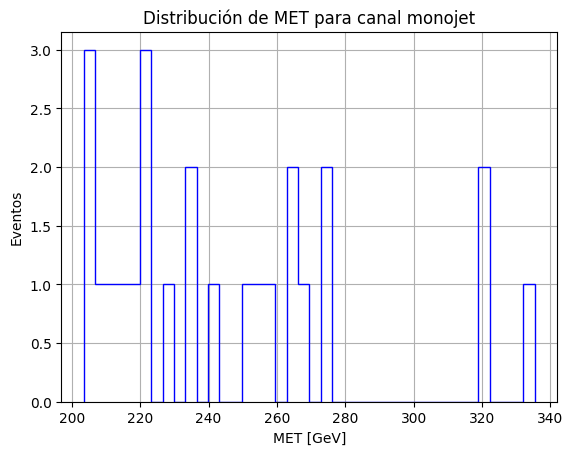

In [24]:
plt.hist(selected_met, bins=40, histtype='step', color='blue')
plt.xlabel("MET [GeV]")
plt.ylabel("Eventos")
plt.title("Distribución de MET para canal monojet")
plt.grid(True)
plt.savefig("met_monojet.png")
plt.show()